## Business Understanding

Objective:
1. Menentukan kelompok nasabah untuk menentukan RESIKO serangan jantung koroner 

## Segmentasi Nasabah Asuransi untuk menemukan tingkat RESIKO jantung koronen dengan pendekatan sains Data

Permasalahan: Unsupervised Learning
Algoritma: K - Means Clustering
Evaluasi: Elbow Method


## Data Understanding

In [1]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import googl edrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load data

url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Data Mining/DataSource/Chapter06DataSet.csv'

load_data = pd.read_csv(url)

df = pd.DataFrame(load_data)

df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [3]:
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

In [4]:
df.isna().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

## Data Preparation

1. Tidak ada JOIN antar table, semua field sudah dicover didalam satu tabel

2. Tidak ada melakukan handling missing value. disebabkan tidak ada data yang NULL balue dan juga NaN value

## Pemodelan data Menggunakan clustering

In [7]:
from sklearn.cluster import KMeans
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Menentukan input variabel
x = df[['Weight',	'Cholesterol',	'Gender']]

# Pada pemodelan Unsupervised Learning tidak ada variabel target

## Elbow Metodologi

adalah suatu metode untuk menentukan nilai N cluster, sehingga cluster tersebut optimal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

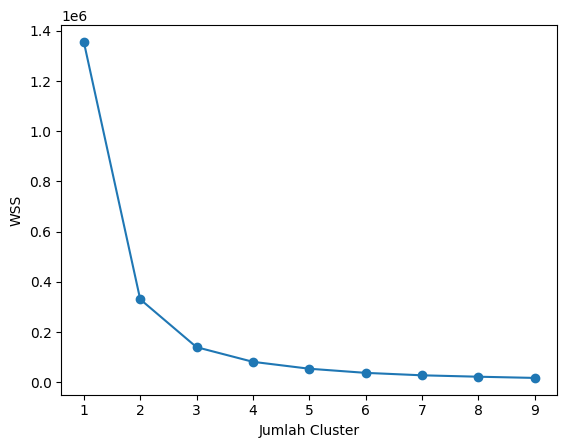

In [10]:
cluster_range = range(1,10)
cluster_wss = []

for num_cluster in cluster_range:
  clusters = KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')
plt.show()

## Hasil analisis Elbow Method

ditemukan garis lengkung ELBOW berada pada titik 2 kemudian melandai di angka 3 dan landai kembali di angka 4

dapat disimpulkan bahwa nilai n cluster akan optimum pada nilai 3 sampai dengan 4

In [15]:
# Menentukan konfigurasi K-Means pada model
cls = KMeans(n_clusters=4, random_state=0)

# Membentuk model
model_cls = cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
df['cluster'] = model_cls.labels_

In [17]:
df.head()

,Weight,Cholesterol,Gender,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,2
4,130,158,1,2


In [18]:
# Export to Excel
from google.colab import files

xlsx = df.to_excel('df_cluster1.xlsx')
files.download('df_cluster1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Hasil Cluster

ada 4 cluster dimana data tersebut menunjukkan:
1. cluster 0 = Critical Cluster
2.  cluster 1 = nasabah asuransi daam keadaan aman (Low Risk)
3. cluster 2 = medium risk
4. cluster 3 = high risk